In [1]:
!nvidia-smi

Tue Apr 30 14:27:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A5000               Off |   00000000:01:00.0 Off |                  Off |
| 30%   35C    P8             18W /  230W |       0MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from datasets import load_dataset

resolution = 384
augmentations = transforms.Compose(
    [
        transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.RandomCrop(resolution),
        transforms.Lambda(lambda x: x),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

def transform_images(examples):
    images = [augmentations(image.convert("RGB")) for image in examples["image"]]
    return {"data": images}


train_batch_size = 4
eval_batch_size = 8
train_dataset_path = "transient-attr-images/train"
eval_dataset_path = "transient-attr-images/test"
_train_ds = load_dataset("imagefolder", data_dir=train_dataset_path, split="train")
_eval_ds = load_dataset("imagefolder", data_dir=eval_dataset_path, split="train")
# _train_ds = ImageFolder(root=train_dataset_path, transform=augmentations)
# _eval_ds = ImageFolder(root=eval_dataset_path, transform=augmentations)

print(f"Train Dataset size: {len(_train_ds)}")
print(f"Eval Dataset size: {len(_eval_ds)}")
_train_ds.set_transform(transform_images)
_eval_ds.set_transform(transform_images)
# train_dataloader = torch.utils.data.DataLoader(
#     train_ds, batch_size=train_batch_size, shuffle=True, num_workers=0
# )
# eval_dataloader = torch.utils.data.DataLoader(
#     eval_ds, batch_size=eval_batch_size, shuffle=True, num_workers=0
# )

/nfshomes/skarki/scratch/miniconda3/envs/llm/lib/python3.9/site-packages/transformers/utils/generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Resolving data files:   0%|          | 0/2079 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/537 [00:00<?, ?it/s]

Train Dataset size: 2079
Eval Dataset size: 537


In [3]:
import os
import pandas as pd
from torch.utils.data import Dataset
from collections import UserDict

        
class CustomImageDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        return UserDict(item)

train_ds = CustomImageDataset(_train_ds)
eval_ds = CustomImageDataset(_eval_ds)

In [4]:
train_ds[0].data

{'data': tensor([[[ 0.1451,  0.2235,  0.1922,  ...,  0.4588,  0.4431,  0.4275],
          [ 0.2000,  0.6392,  0.2784,  ...,  0.4510,  0.4431,  0.4353],
          [-0.0039,  0.6235, -0.1765,  ...,  0.4431,  0.4431,  0.4353],
          ...,
          [-0.0353, -0.0510, -0.0431,  ..., -0.4510, -0.4588, -0.4667],
          [-0.0431, -0.0431, -0.0353,  ..., -0.4588, -0.4588, -0.4667],
          [-0.0510, -0.0510, -0.0431,  ..., -0.4667, -0.4745, -0.4667]],
 
         [[ 0.1843,  0.2706,  0.2392,  ...,  0.4353,  0.4196,  0.4039],
          [ 0.2392,  0.6706,  0.3098,  ...,  0.4275,  0.4196,  0.4118],
          [ 0.0275,  0.6314, -0.1451,  ...,  0.4196,  0.4196,  0.4118],
          ...,
          [ 0.0431,  0.0353,  0.0431,  ..., -0.3882, -0.3961, -0.3961],
          [ 0.0275,  0.0431,  0.0510,  ..., -0.4039, -0.4039, -0.4118],
          [ 0.0196,  0.0353,  0.0431,  ..., -0.4353, -0.4275, -0.4275]],
 
         [[ 0.1373,  0.2314,  0.2078,  ...,  0.3020,  0.2863,  0.2706],
          [ 0.2078, 

In [5]:
train_ds[0]

{'data': tensor([[[ 0.1294,  0.1294,  0.1843,  ...,  0.4039,  0.4039,  0.3961],
         [ 0.1373,  0.1922,  0.4980,  ...,  0.3961,  0.4039,  0.4039],
         [ 0.1451,  0.2392,  0.6000,  ...,  0.3961,  0.4039,  0.3961],
         ...,
         [ 0.0039,  0.0039, -0.0039,  ..., -0.6235, -0.6235, -0.6471],
         [ 0.0118,  0.0039,  0.0039,  ..., -0.6471, -0.6549, -0.6627],
         [ 0.0039, -0.0118,  0.0118,  ..., -0.6549, -0.6706, -0.6784]],

        [[ 0.1686,  0.1686,  0.2314,  ...,  0.3804,  0.3804,  0.3725],
         [ 0.1686,  0.2157,  0.5294,  ...,  0.3725,  0.3804,  0.3804],
         [ 0.1686,  0.2549,  0.6157,  ...,  0.3725,  0.3804,  0.3725],
         ...,
         [ 0.0902,  0.0902,  0.0902,  ..., -0.5843, -0.5843, -0.6078],
         [ 0.0902,  0.0902,  0.0980,  ..., -0.6078, -0.6157, -0.6235],
         [ 0.0824,  0.0745,  0.0980,  ..., -0.6157, -0.6314, -0.6392]],

        [[ 0.1373,  0.1373,  0.2000,  ...,  0.2471,  0.2471,  0.2392],
         [ 0.1451,  0.1922,  0.5059,

In [7]:
from pythae.pipelines import TrainingPipeline
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig


training_config = BaseTrainerConfig(
	output_dir='transient-attr-vae-hf',
	num_epochs=50,
	learning_rate=1e-3,
	per_device_train_batch_size=4,
	per_device_eval_batch_size=8,
	train_dataloader_num_workers=0,
	eval_dataloader_num_workers=0,
	steps_saving=20,
	optimizer_cls="AdamW",
	optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.995)},
	scheduler_cls="ReduceLROnPlateau",
	scheduler_params={"patience": 5, "factor": 0.5}
)
# Set up the model configuration 
vae_config = model_config = VAEConfig(
	input_dim=(4, 384, 384),
	latent_dim=64
)
# Build the model
vae_model = VAE(
	model_config=vae_config
)

pipeline = TrainingPipeline(
 	training_config=training_config,
 	model=vae_model
)
# Launch the Pipeline
pipeline(
	train_data=train_ds, # must be torch.Tensor, np.array or torch datasets
	eval_data=eval_ds # must be torch.Tensor, np.array or torch datasets
)

Checking train dataset...
Checking eval dataset...
Using Base Trainer



['_MutableMapping__marker', '__abstractmethods__', '__class__', '__class_getitem__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', 'clear', 'copy', 'data', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']
['_MutableMapping__marker', '__abstractmethods__', '__class__', '__class_getitem__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', 

ModelError: Error when calling forward method from model. Potential issues: 
 - Wrong model architecture -> check encoder, decoder and metric architecture if you provide yours 
 - The data input dimension provided is wrong -> when no encoder, decoder or metric provided, a network is built automatically but requires the shape of the flatten input data.
Exception raised: <class 'RuntimeError'> with message: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [89]:
!cat ~/scratch/miniconda3/envs/llm/lib/python3.9/site-packages/pythae/pipelines/training.py | head -n 186

import logging
from typing import List, Optional, Union

import numpy as np
import torch

from ..customexception import DatasetError
from ..data.datasets import collate_dataset_output
from ..data.preprocessors import BaseDataset, DataProcessor
from ..models import BaseAE
from ..trainers import *
from ..trainers.training_callbacks import TrainingCallback
from .base_pipeline import Pipeline

logger = logging.getLogger(__name__)

# make it print to the console.
console = logging.StreamHandler()
logger.addHandler(console)
logger.setLevel(logging.INFO)


class TrainingPipeline(Pipeline):
    """
    This Pipeline provides an end to end way to train your VAE model.
    The trained model will be saved in ``output_dir`` stated in the
    :class:`~pythae.trainers.BaseTrainerConfig`. A folder
    ``training_YYYY-MM-DD_hh-mm-ss`` is
    created where checkpoints and final model will be saved. Checkpoints are saved in
    ``checkpoint_epoch_{epoch}`` folder (optimizer and training config
    saved

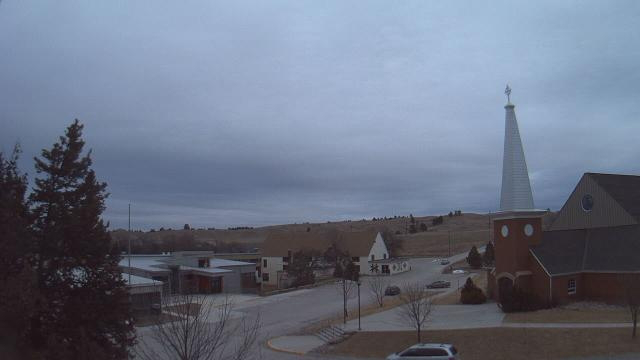

In [3]:
from PIL import Image

img = Image.open("transient-attr-images/test/sunny/17.jpg")
img

In [4]:
img = Image.open("transient-attr-images/test/sunny/158.jpg")
np.array(img).shape

(360, 640, 3)

In [5]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from datasets import load_dataset

resolution = 384
augmentations = transforms.Compose(
    [
        transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.RandomCrop(resolution),
        transforms.Lambda(lambda x: x),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

def transform_images(examples):
    images = [augmentations(image.convert("RGB")) for image in examples["image"]]
    return {"input": images}



train_batch_size = 4
dataset_path = "transient-attr-images/train"
# train_ds = ImageFolder(root=dataset_path, transform=transform)
train_ds = load_dataset("imagefolder", data_dir="transient-attr-images/train", split="train")
print(f"Dataset size: {len(train_ds)}")
train_ds.set_transform(transform_images)
train_dataloader = torch.utils.data.DataLoader(
    train_ds, batch_size=train_batch_size, shuffle=True, num_workers=0
)

Resolving data files:   0%|          | 0/2079 [00:00<?, ?it/s]

Dataset size: 2079


In [6]:
def forward(model, x):
    # z_mu, z_var = Q(X)
    # z = sample_z(z_mu, z_var)
    # X_sample = P(z)

    # # Loss
    # recon_loss = nn.binary_cross_entropy(X_sample, X, size_average=False) / mb_size
    # kl_loss = torch.mean(0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1. - z_var, 1))
    # loss = recon_loss + kl_loss

    # posterior = model.encode(x).latent_dist
    # print(posterior)
    # if sample_posterior:
    #     z = posterior.sample(generator=generator)
    # else:
    #     z = posterior.mode()
    # dec = self.decode(z).sample

    # if not return_dict:
    #     return (dec,)

    # return DecoderOutput(sample=dec)


    posterior = model.encode(x).latent_dist
    z = posterior.mode()
    # z = posterior.sample()
    
    x_sample = model.decode(z).sample
    # Loss
    recon_loss = F.mse_loss(x_sample, x)
    # kl_loss = torch.mean(0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1. - z_var, 1))
    kl_loss = posterior.kl()
    loss = recon_loss + kl_loss
    return x_sample,  loss.mean(), recon_loss.mean(), kl_loss.mean()

In [8]:
def forwardV2(model, x):
    # z_mu, z_var = Q(X)
    # z = sample_z(z_mu, z_var)
    # X_sample = P(z)

    # # Loss
    # recon_loss = nn.binary_cross_entropy(X_sample, X, size_average=False) / mb_size
    # kl_loss = torch.mean(0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1. - z_var, 1))
    # loss = recon_loss + kl_loss

    # posterior = model.encode(x).latent_dist
    # print(posterior)
    # if sample_posterior:
    #     z = posterior.sample(generator=generator)
    # else:
    #     z = posterior.mode()
    # dec = self.decode(z).sample

    # if not return_dict:
    #     return (dec,)

    # return DecoderOutput(sample=dec)


    posterior = model.encode(x).latent_dist
    z = posterior.mode()
    # z = posterior.sample()
    
    x_sample = model.decode(z).sample
    print(x_sample)
    # Loss
    # recon_loss = F.mse_loss(x_sample, x)
    
    recon_loss = 0.5 * F.mse_loss(
        x_sample.reshape(x.shape[0], -1),
        x.reshape(x.shape[0], -1),
        reduction="none",
    ).sum(dim=-1)
    # kl_loss = torch.mean(0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1. - z_var, 1))
    # kl_loss = posterior.kl()
    # loss = recon_loss + kl_loss



    # return 0.5 * torch.sum(
    #                 torch.pow(self.mean, 2) + self.var - 1.0 - self.logvar,
    #                 dim=[1, 2, 3],
    #             )


    # print(posterior.logvar.shape, posterior.mean.shape)
    KLD = 0.5 * torch.sum(
        torch.pow(posterior.mean, 2) + posterior.var - 1.0 - posterior.logvar,
        dim=[1, 2, 3],
    )

    loss = (recon_loss + KLD).mean(dim=0)
    return x_sample, loss , recon_loss.mean(dim=0), KLD.mean(dim=0)

In [9]:
batch = next(iter(train_dataloader))

In [10]:
out = forwardV2(model, batch["input"].to(device))
out[1:]

tensor([[[[ 6.1401e-02,  3.3449e-02,  4.5689e-02,  ...,  1.1230e-03,
            3.2214e-02, -2.1707e-03],
          [ 5.9211e-02, -3.6566e-02, -1.9187e-04,  ..., -3.1947e-02,
           -2.5355e-03, -1.5321e-02],
          [ 1.1577e-01,  3.1711e-02,  5.2288e-02,  ...,  1.3594e-02,
            6.4273e-03, -8.0325e-02],
          ...,
          [ 1.1799e-01, -1.0188e-01, -1.9258e-01,  ...,  7.5818e-02,
            7.4566e-02, -3.1551e-02],
          [ 1.1896e-01, -2.5059e-02, -1.0626e-01,  ...,  8.1579e-02,
            5.5377e-02, -3.0891e-03],
          [ 9.1530e-02,  5.2456e-03, -2.2944e-02,  ...,  1.0935e-01,
            8.2634e-02,  7.1679e-03]],

         [[ 6.2095e-02,  7.1196e-02,  4.1025e-02,  ...,  7.8672e-03,
            8.6226e-03,  6.1637e-02],
          [ 3.2556e-02,  2.9955e-02,  3.0784e-02,  ...,  1.2992e-01,
            7.8127e-02,  1.1505e-01],
          [ 1.2399e-02,  3.1560e-03,  1.5950e-02,  ...,  9.5462e-02,
            2.6341e-02,  9.4985e-02],
          ...,
     

(tensor(72786.7656, device='cuda:0', grad_fn=<MeanBackward1>),
 tensor(72184.3125, device='cuda:0', grad_fn=<MeanBackward1>),
 tensor(602.4584, device='cuda:0', grad_fn=<MeanBackward1>))

In [10]:
# out[-1]

In [11]:
# import matplotlib.pyplot as plt

# _x = out[0][0].detach().cpu()
# plt.imshow(_x.permute(1, 2, 0))

In [12]:
# def show_img(img_tensor):
#     img_tensor = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())
#     img_tensor = torch.clamp(img_tensor, 0, 1) * 255
    
#     # Convert to numpy and display using matplotlib
#     image = img_tensor.numpy().transpose(1, 2, 0)  # Assuming the format is CxHxW, convert to HxWxC
#     plt.imshow(image)
#     plt.axis('off')  # Turn off axis numbers and ticks
#     plt.show()
#     return img_tensor

In [13]:
# show_img(_x)

In [14]:
from tqdm.auto import tqdm, trange
import os
from diffusers.optimization import get_scheduler

task_name = "transient-attr-vae-hf"
num_epochs = 20
gradient_accumulation_steps = 1

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-5,
    betas=(0.95, 0.999),
    weight_decay=1e-6,
    eps=1e-08,
)


lr_scheduler = get_scheduler(
    "cosine",
    optimizer=optimizer,
    num_warmup_steps=100 * gradient_accumulation_steps,
    num_training_steps=(len(train_dataloader) * num_epochs),
)

step_count = 0
image_save_steps = 64
acc_steps = 4
img_save_count = 0
vae_autoencoder_ckpt_name = 'vqvae_autoencoder_ckpt.pth'


with trange(num_epochs, desc="Epoch") as ep:
    for epoch_idx in ep:
        losses = []
        recon_losses = []
        kl_losses = []
        optimizer.zero_grad()
        with tqdm(train_dataloader, desc="Train") as tr_loop:
            for batch in tr_loop:
                step_count += 1
                x = batch["input"].to(device)
                x_hat, loss, recon_loss, kl_loss = forwardV2(model, x)
                
                # Image Saving Logic
                if step_count % image_save_steps == 0 or step_count == 1:
                    sample_size = min(8, x.shape[0])
                    save_output = torch.clamp(x_hat[:sample_size], -1., 1.).detach().cpu()
                    save_output = ((save_output + 1) / 2)
                    save_input = ((x[:sample_size] + 1) / 2).detach().cpu()
                    
                    grid = make_grid(torch.cat([save_input, save_output], dim=0), nrow=sample_size)
                    img = transforms.ToPILImage()(grid)
                    if not os.path.exists(os.path.join(task_name,'vqvae_autoencoder_samples')):
                        os.mkdir(os.path.join(task_name, 'vqvae_autoencoder_samples'))
                    img.save(os.path.join(task_name,'vqvae_autoencoder_samples',
                                          'current_autoencoder_sample_{}.png'.format(img_save_count)))
                    img_save_count += 1
                    img.close()
                tr_loop.set_postfix(loss=loss.item(), recon_loss=recon_loss.item(), kl_loss=kl_loss.item())
                losses.append(loss.item())
                recon_losses.append(recon_loss.item())
                kl_losses.append(kl_loss.item())
                loss.backward()
               
                
                if step_count % acc_steps == 0:
                    optimizer.step()
                    optimizer.zero_grad()
        optimizer.step()
        optimizer.zero_grad()
        avg_epoch_loss = sum(losses) / len(losses)
        avg_epoch_recon_loss = sum(recon_losses) / len(recon_losses)
        avg_epoch_kl_loss = sum(kl_losses) / len(kl_losses)
        ep.set_postfix(avg_epoch_loss=avg_epoch_loss, avg_epoch_recon_loss=avg_epoch_recon_loss, avg_epoch_kl_loss=avg_epoch_kl_loss)
        
        torch.save(model.state_dict(), os.path.join(task_name, vae_autoencoder_ckpt_name))
print('Done Training...')

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Train:   0%|          | 0/520 [00:00<?, ?it/s]


KeyboardInterrupt

